In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from operator import itemgetter
from statistics import mean 

<h2>Funciones de prueba</h2>

In [3]:
def plotFunction(limInf, limSup, n, F):
  print(limInf, limSup, n)
  x1 = np.linspace(limInf[0], limSup[0], n)
  x2 = np.linspace(limInf[1], limSup[1], n)
  X, Y = np.meshgrid(x1, x2)


  FX = list()
  temp = list()

  for i in range(len(X)):
    for j in range(len(X)):
      val = F([X[i][j],Y[i][j]])
      temp.append(val)
      
    FX.append(temp.copy())
    temp.clear()

  FX = np.array(FX)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  #ax.contour3D(X, Y, FX, 50, cmap='binary')
  ax.plot_surface(X, Y, FX, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

<h3>Función de la esfera</h3>


$F esfera(x) = \sum_{i=1}^n x_i^2$

[-5.12, -5.12] [5.12, 5.12] 100


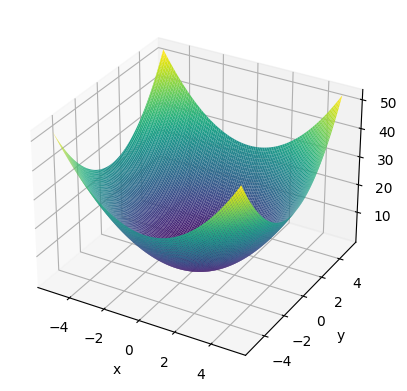

In [4]:
def sphere_function(x):
    """
    Función de prueba de la esfera.
    x: Vector de variables de decisión.
    """
    n = len(x)
    sum = 0
    for i in range(n):
        sum += x[i]**2
    return sum

plotFunction([-5.12,-5.12], [5.12,5.12],100, sphere_function)


<h3>Función de Rosenbrock</h3>

$F rosenbrock(x) = \sum_{i=1}^{n-1} 100(x_i^2 - x_{i+1})^2 + (1-x_i)^2$

[-2.048, -2.048] [2.048, 2.048] 100


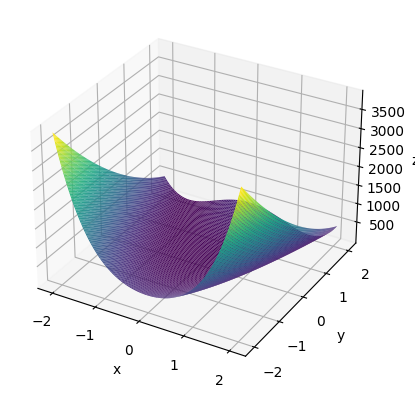

In [5]:
def rosenbrock_function(x):
    """
    Función de prueba de la Rosenbrock.
    x: Vector de variables de decisión.
    """
    n = len(x)-1
    sum = 0
    for i in range(n):
        sum += 100*(x[i]**2-x[i+1])**2 + (1-x[i])**2
    return sum



plotFunction([-2.048,-2.048], [2.048,2.048],100, rosenbrock_function)

<h3>Función de Ackley</h3>

$f(x) = -20\exp\left(-0.2\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}\right)-\exp\left(\frac{1}{n}\sum_{i=1}^{n}\cos(2\pi x_i)\right)+20+e$



[-32.768, -32.768] [32.768, 32.768] 200


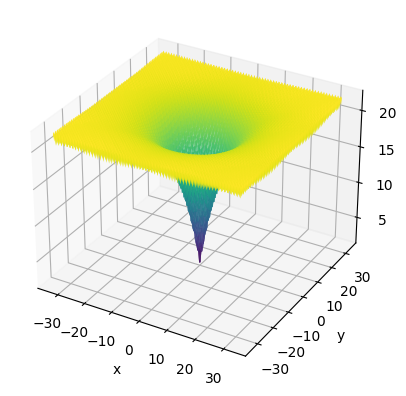

In [6]:
def ackley_function(x):
    x = np.array(x)
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2*math.pi*x))
    term1 = -20 * math.exp(-0.2 * math.sqrt(sum1/n))
    term2 = -math.exp(sum2/n)
    return term1 + term2 + 20 + np.e

plotFunction([-32.768,-32.768], [32.768,32.768],200,ackley_function)

In [7]:
def calculaAptitud(X, mode):
  if mode == 0:
    return sphere_function(X)
  elif mode == 1:
    return rosenbrock_function(X)
  elif mode == 2: 
    return ackley_function(X) 

Hasta este punto ya se probaron todas los benchmarks, ahora es necesario definir los arreglos de 10 dimensiones que contengan los limites superiores e inferiores de cada uno de los benchmarks

<h2>Codificacion y decodificacion binaria</h2>

In [9]:
def decNum(minVal, maxVal):
    strMaxVal = str(maxVal)
    numDecimalesMaxVal = len(strMaxVal) - strMaxVal.find('.') - 1

    strMinVal = str(minVal)
    numDecimalesMinVal = len(strMinVal) - strMinVal.find('.') - 1

    numDecimales = max([numDecimalesMaxVal, numDecimalesMinVal])

    lenCode = math.ceil(math.log2((maxVal*(10**numDecimales)) - (minVal*(10**numDecimales))))
    
    return numDecimales, lenCode

def codificacion(minVal, maxVal, valToCode):

    if maxVal < valToCode or minVal > valToCode:
        print('El valor se sale del rango')
        return ''
    
    else:

        numDecimales, lenCode = decNum(minVal, maxVal)

        numDecimales = 4

        binCode = bin(int((valToCode*(10**numDecimales)) - (minVal*(10**numDecimales))))
        binCode = binCode[2:]

        code = ''

        if len(binCode) == lenCode:
            code = binCode
        else:
            for i in range(lenCode - len(binCode)):
                code += '0'
            code += binCode
    
        return code

def decodificacion(minVal=[], maxVal = [], valToDecode = []):
    
    decSolutions = []

    for i in range(len(valToDecode)):
        numDecimales = 4
        decSol = (int(valToDecode[i], 2) + (minVal[i]*(10**numDecimales)))/10**numDecimales
        

        if decSol > maxVal[i]:
            decSolutions.append('')
        else:
            decSolutions.append(decSol)

    return decSolutions



Esta es la prueba de la codificación y decodificación para los intervalos de 0.35 a 1.40 con resolución de 4 decimales y un valor de 0.39 

In [10]:
maxVal = 1.40
minVal = 0.35
target = 0.39

code = codificacion(minVal,maxVal,target)
decode = decodificacion([minVal],[maxVal],[code])
print(f'La codificacion de {target} en el intervalo de {minVal} a {maxVal} con una presición de 4 decimales es: {code} y la decodificacion es: {decode[0]}')

La codificacion de 0.39 en el intervalo de 0.35 a 1.4 con una presición de 4 decimales es: 110010000 y la decodificacion es: 0.39


Esta es la prueba de la codificación y decodificación para los intervalos de 5.25 a 10.10 con resolución de 4 decimales y un valor de 8.967

In [11]:
maxVal = 10.10
minVal = 5.25
target = 8.967

code = codificacion(minVal,maxVal,target)
decode = decodificacion([minVal],[maxVal],[code])
print(f'La codificacion de {target} en el intervalo de {minVal} a {maxVal} con una presición de 4 decimales es: {code} y la decodificacion es: {decode[0]}')

La codificacion de 8.967 en el intervalo de 5.25 a 10.1 con una presición de 4 decimales es: 1001000100110010 y la decodificacion es: 8.967


<h2>Estrategia de selección de padres</h2>

<h3>La ruleta</h3>

In [12]:
def seleccion_ruleta(poblacion, fitness):
    # Normalizar el fitness
    probabilidad = fitness / np.sum(fitness)
    # Calcular la probabilidad acumulada
    probabilidad_acumulada = np.cumsum(probabilidad)
    # Generar números aleatorios uniformes
    r = np.random.uniform(0, 1, size=len(poblacion))
    # Seleccionar los padres
    padres = []
    for i in range(len(poblacion)):
        # Encontrar el primer individuo cuya probabilidad acumulada sea mayor o igual al número aleatorio
        index = np.where(probabilidad_acumulada >= r[i])[0][0]
        padres.append(poblacion[index])
    return padres

<h3>Sobrante estocástico sin remplazo</h3>

In [13]:
def sser_selection(population, fitness, num_parents):
    # Normalizar los valores de fitness
    fitness_norm = fitness / np.sum(fitness)

    # Crear una lista de índices de la población
    idx_population = np.arange(len(population))

    # Crear un array para guardar los padres seleccionados
    parents = np.empty((num_parents, len(population[0])), dtype=population.dtype)

    # Calcular el número de individuos que serán seleccionados por intervalo
    individuals_per_interval = np.floor(num_parents / len(population)).astype(int)

    # Crear un array con n puntos aleatorios dentro del rango [0, 1/n]
    r = np.random.uniform(size=individuals_per_interval) / len(population)

    # Seleccionar los individuos de cada intervalo
    for i in range(len(population)):
        # Calcular los límites del intervalo actual
        lower_bound = i / len(population)
        upper_bound = (i + 1) / len(population)

        # Seleccionar los puntos aleatorios dentro del intervalo
        idx_selected = np.where((lower_bound <= r) & (r < upper_bound))[0]

        # Seleccionar los individuos correspondientes a los puntos aleatorios
        idx_individuals = np.random.choice(idx_population[fitness_norm.argsort()[::-1]],
                                            size=len(idx_selected),
                                            replace=False)

        # Guardar los individuos seleccionados
        parents[idx_selected] = population[idx_individuals]

    return parents


<h3>Sobrante estocástico con remplazo</h3>

In [14]:
def stochastic_remainder_with_replacement(population, fitness, num_parents):
    # Normalize fitness values
    normalized_fitness = fitness / np.sum(fitness)
    # Initialize array to hold selected parents
    parents = np.zeros((num_parents, population.shape[1]))
    # Calculate the number of times each individual should be selected
    num_copies = np.floor(normalized_fitness * num_parents)
    # Calculate the remainder probabilities
    remainder_probs = normalized_fitness - num_copies
    # Add the individuals with the highest remainders until the parent array is full
    i = 0
    while np.sum(num_copies) < num_parents:
        remainder_inds = np.argsort(remainder_probs)[::-1][:num_parents - np.sum(num_copies)]
        num_copies[remainder_inds] += 1
    # Select parents with replacement
    parent_index = 0
    for i in range(population.shape[0]):
        for j in range(int(num_copies[i])):
            parents[parent_index,:] = population[i,:]
            parent_index += 1
    return parents


<h3>Universal estocástica</h3>

In [15]:
def universal_stochastic_selection(population, fitness):
    total_fitness = np.sum(fitness)
    num_parents = len(population)
    section_size = total_fitness / num_parents
    start_point = np.random.uniform(0, section_size)
    pointers = np.arange(start_point, total_fitness, section_size)
    parents = []
    for i in range(num_parents):
        j = 0
        while fitness[j] < pointers[i]:
            j += 1
        parents.append(population[j])
    return parents


<h3>Muestreo determinístico</h3>

In [16]:
def deterministicSampling(population, numParents):
    sortedPop = sorted(population, key=lambda x: x.fitness, reverse=True)
    intervalSize = int(len(population) / numParents)
    selectedParents = []
    for i in range(numParents):
        selectedParents.append(sortedPop[i * intervalSize])
    return selectedParents

<h2>Estrategía de selección de sobrevivientes<h2>

<h3>Selección mediante torneo binario probabilista</h3>

In [17]:
def tournament_selection(population, tournament_size, num_survivors):
    # Select num_survivors individuals from the population using binary tournament selection
    survivors = []
    while len(survivors) < num_survivors:
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda x: x.fitness)
        survivors.append(winner)
    return survivors

<h3>Selección mediante torneo binario deterministico</h3>


In [18]:
def binaryTournament(population, k):
    """Select survivors using binary tournament deterministic selection.

    Args:
        population (list): A list of individuals.
        k (int): The number of individuals to select as survivors.

    Returns:
        survivors (list): A list of selected individuals.
    """
    survivors = []
    for i in range(k):
        contender1 = random.choice(population)
        contender2 = random.choice(population)
        if contender1.fitness >= contender2.fitness:
            survivors.append(contender1)
        else:
            survivors.append(contender2)
    return survivors


<h3>Selección del estado uniforme</h3>

In [19]:
def uniformSelection(population, nSurvivors):
    """
    Selección de sobrevivientes mediante selección del estado uniforme.
    
    population: población actual
    nSurvivors: número de individuos que se desea mantener en la siguiente generación
    
    return: lista con los índices de los individuos seleccionados como sobrevivientes
    """
    # Se crea un arreglo con los índices de la población actual
    idx = np.arange(len(population))
    # Se seleccionan aleatoriamente nSurvivors índices de la población
    selectedIdx = np.random.choice(idx, nSurvivors, replace=False)
    # Se devuelve una lista con los índices seleccionados
    return selectedIdx.tolist()

<h3>Selección disruptiva</h3>

In [20]:
def disruptive_uniform_selection(population, num_survivors,calculate_fitness):
    """
    Selects the survivors using the disruptive uniform selection strategy.

    Parameters:
    population (numpy array): The current population.
    num_survivors (int): The number of survivors to select.

    Returns:
    numpy array: The selected survivors.
    """
    # Calculate the fitness values of the population
    fitness = calculate_fitness(population)

    # Sort the population by fitness in descending order
    sorted_pop = population[np.argsort(-fitness)]

    # Split the population in two equally sized groups
    split_idx = len(sorted_pop) // 2
    group1 = sorted_pop[:split_idx]
    group2 = sorted_pop[split_idx:]

    # Calculate the fitness values of the two groups
    group1_fitness = calculate_fitness(group1)
    group2_fitness = calculate_fitness(group2)

    # Select the survivors by randomly choosing from the two groups with equal probability
    survivors = np.empty((num_survivors, sorted_pop.shape[1]))
    for i in range(num_survivors):
        if np.random.rand() < 0.5:
            # Select a survivor from group 1
            idx = np.random.choice(len(group1), replace=False)
            survivors[i] = group1[idx]
            # Remove the selected individual from group 1
            group1 = np.delete(group1, idx, axis=0)
            group1_fitness = np.delete(group1_fitness, idx)
        else:
            # Select a survivor from group 2
            idx = np.random.choice(len(group2), replace=False)
            survivors[i] = group2[idx]
            # Remove the selected individual from group 2
            group2 = np.delete(group2, idx, axis=0)
            group2_fitness = np.delete(group2_fitness, idx)

    return survivors

<h3>Jerarquias no lineales</h3>

In [21]:
def nonlinearSelection(population, numSurvivors):
    # Ordenar la población según la aptitud (en orden ascendente)
    sortedPopulation = sorted(population, key=lambda x: x.fitness)
    # Asignar niveles de aptitud en orden inverso
    levels = [i+1 for i in range(len(sortedPopulation))]
    levels.reverse()
    # Calcular la suma de las aptitudes de todos los individuos en cada nivel
    levelSums = [0]*len(levels)
    for i in range(len(sortedPopulation)):
        level = levels[i]
        levelSums[level-1] += sortedPopulation[i].fitness
    # Seleccionar los sobrevivientes
    survivors = []
    while len(survivors) < numSurvivors:
        # Seleccionar un nivel de aptitud al azar
        r = random.uniform(0, sum(levelSums))
        levelSum = 0
        for i in range(len(levels)):
            levelSum += levelSums[i]
            if levelSum >= r:
                # Seleccionar un individuo aleatorio de ese nivel
                levelPopulation = [p for p in sortedPopulation if levels[p.index] == levels[i]]
                survivor = random.choice(levelPopulation)
                survivors.append(survivor)
                # Restar la aptitud del sobreviviente del total de su nivel
                levelSums[i] -= survivor.fitness
                break
    return survivors

<h2>Estructura del algoritmo genetico</h2>

<h3>Inicialización la población</h3>

In [35]:
def poblacionInicial(tam, numVar, mode):

  esferaMinVal = np.full(numVar,-5.12)
  esferaMaxVal = np.full(numVar, 5.12)

  rosenbrockMinVal = np.full(numVar,-2.048)
  rosenbrockMaxVal = np.full(numVar, 2.048)

  ackleyMinVal = np.full(numVar,-32.768)
  ackleyMaxVal = np.full(numVar, 32.768)

  if mode == 0:
    limInf = esferaMinVal
    limSup = esferaMaxVal
    function = sphere_function
  elif mode == 1:
    limInf = rosenbrockMinVal
    limSup = rosenbrockMaxVal
    function = rosenbrock_function
  elif mode == 2:
    limInf = ackleyMinVal
    limSup = ackleyMaxVal
    function = ackley_function

  poblacion = list()
  fitness = list()

  for i in range(0, tam): 
    X = list()
    for j in range(0, numVar):
      X.append(random.uniform(limInf[j], limSup[j]))

    fitness.append(function(X))

    poblacion.append(X.copy)
  return poblacion, fitness

In [37]:
pobInicial, fitness = poblacionInicial(200, 5, 0)

<h3>Selección de padres</h3>

In [ ]:
def seleccionPadres(poblacion, numPadres = 0, fitness = [], mode = 0):
    if mode == 0:
        return seleccion_ruleta(poblacion, fitness)
    elif mode == 1:
        return sser_selection(poblacion, fitness, numPadres)
    elif mode == 2:
        return stochastic_remainder_with_replacement(poblacion, fitness, numPadres)
    elif mode == 3:
        universal_stochastic_selection(poblacion, fitness)
    elif mode == 4:
        return deterministicSampling(poblacion, numPadres)

Cruza de padres con cierta probabilidad